In [2]:
using CairoMakie
using NCDatasets

In [3]:
include("TopographicHorizontalConvection.jl")

TopographicHorizontalConvection (generic function with 1 method)

In [4]:
simulation = TopographicHorizontalConvection(h₀_frac=0.6, output_writer=false, architecture=CPU())

Simulation of NonhydrostaticModel{CPU, ImmersedBoundaryGrid}(time = 0 seconds, iteration = 0)
├── Next time step: 6.250 ms
├── Elapsed wall time: 0 seconds
├── Wall time per iteration: NaN days
├── Stop time: 3.333 minutes
├── Stop iteration : Inf
├── Wall time limit: Inf
├── Callbacks: OrderedDict with 6 entries:
│   ├── stop_time_exceeded => Callback of stop_time_exceeded on IterationInterval(1)
│   ├── stop_iteration_exceeded => Callback of stop_iteration_exceeded on IterationInterval(1)
│   ├── wall_time_limit_exceeded => Callback of wall_time_limit_exceeded on IterationInterval(1)
│   ├── nan_checker => Callback of NaNChecker for u on IterationInterval(100)
│   ├── wizard => Callback of TimeStepWizard(cfl=0.5, max_Δt=Inf, min_Δt=0.0) on IterationInterval(50)
│   └── progress => Callback of (::var"#progress#9") on IterationInterval(10)
├── Output writers: OrderedDict with no entries
└── Diagnostics: OrderedDict with no entries

In [44]:
grid = simulation.model.grid.underlying_grid

2048×64×256 RectilinearGrid{Float64, Bounded, Periodic, Bounded} on CPU with 4×4×4 halo
├── Bounded  x ∈ [-4.0, 4.0]     regularly spaced with Δx=0.00390625
├── Periodic y ∈ [-0.125, 0.125) regularly spaced with Δy=0.00390625
└── Bounded  z ∈ [-1.0, 0.0]     regularly spaced with Δz=0.00390625

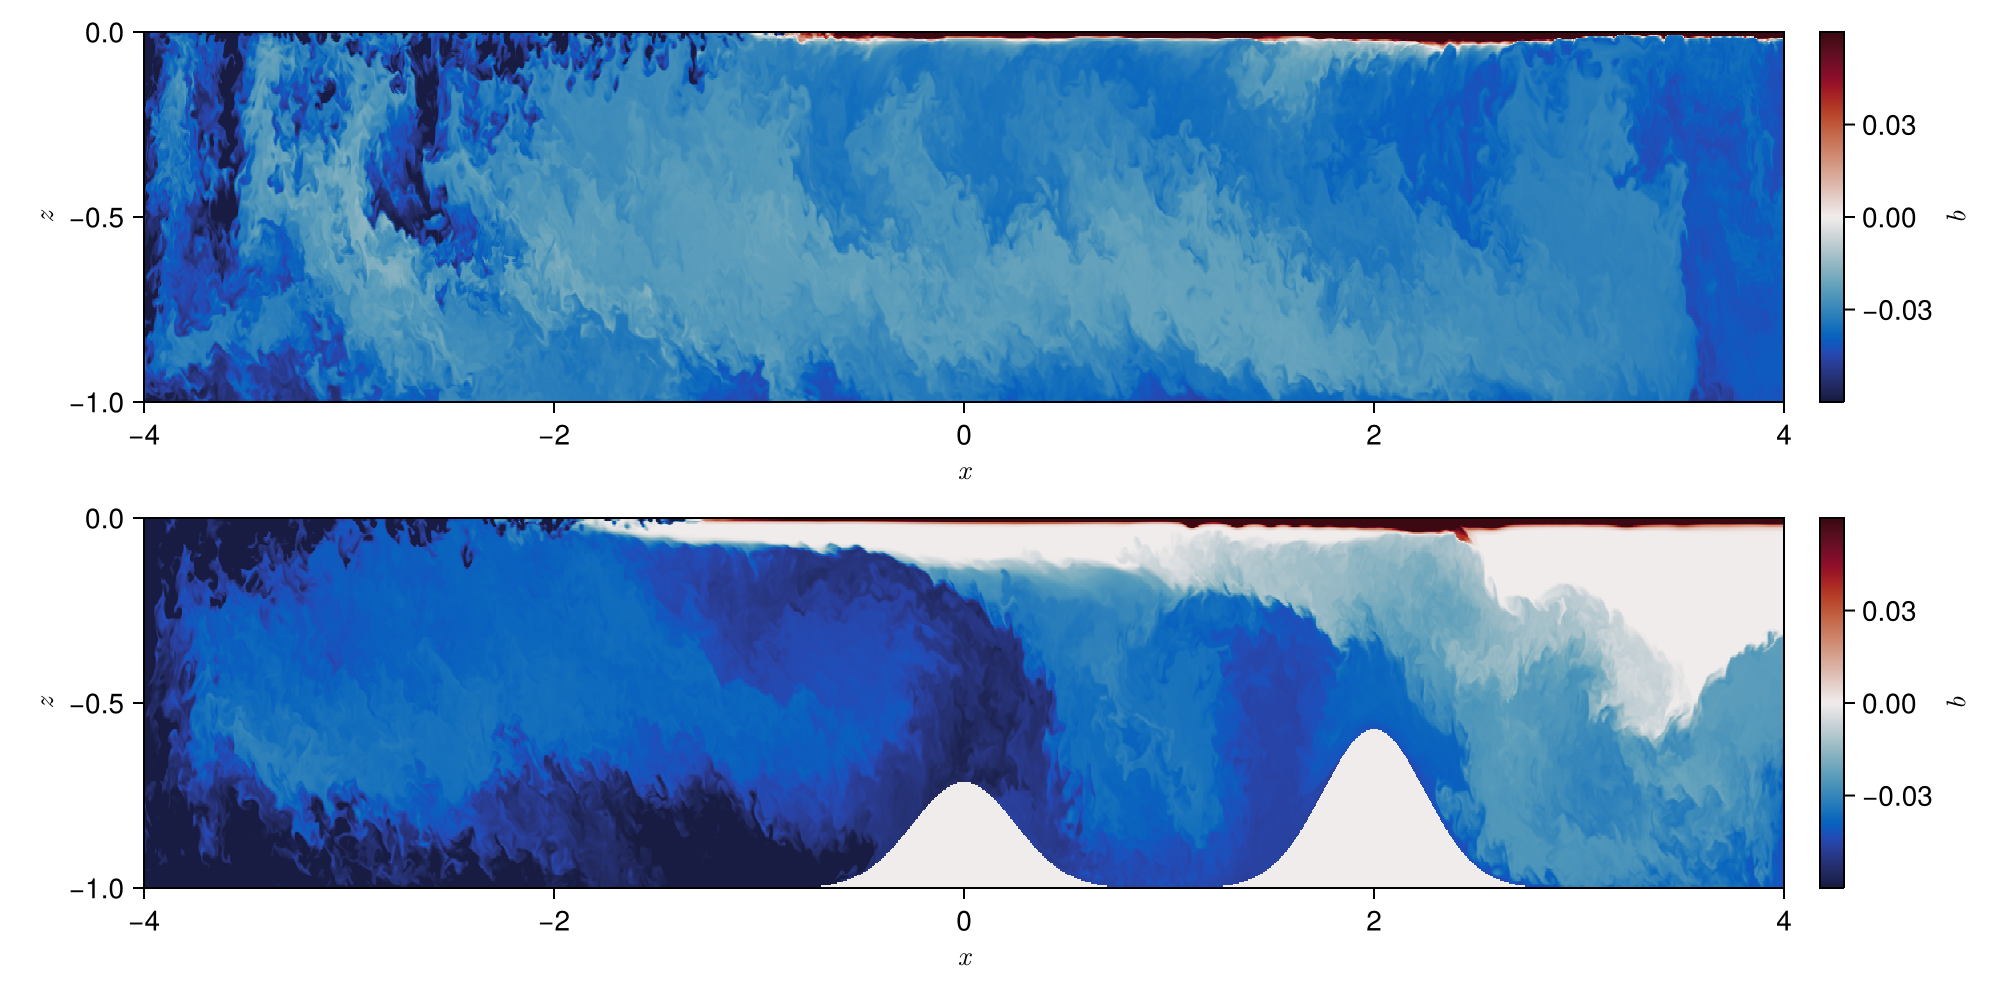

In [41]:
t = 10

f = Figure(size=(1000, 500))

for (i, h₀) in enumerate([0.0, 0.6])
    limits = ((grid.xᶠᵃᵃ[1], grid.xᶠᵃᵃ[grid.Nx+1]), ((grid.zᵃᵃᶠ[1], grid.zᵃᵃᶠ[grid.Nz+1])))
    ax = Axis(f[i,1], xlabel=L"$x$", ylabel=L"$z$", limits=limits)
    ds = NCDataset(string("/pub/hfdrake/code/HorizontalConvection/output/turbulent_h", h₀, "_buoyancy.nc"));
    j = grid.Ny ÷ 2 # Section through center of domain
    hm = heatmap!(ax, ds["xF"][:], ds["zF"][:], ds["b"][:,j,:,t], colorrange = (-0.06, 0.06), colormap = :balance)
    Colorbar(f[i,2], hm, label=L"$b$");
    close(ds) # Make sure that we close the dataset!
end

f

In [43]:
save("../figures/thc_slice.png", f)

CairoMakie.Screen{IMAGE}
